**Setup**

In [ ]:
import numpy as np 
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

**Data Preparation**

8


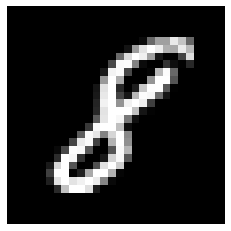

In [ ]:
# Model/data parameters 
num_classes = 10 #digits 0-9
input_shape = (28,28,1)

# load the data and divide it into train/test split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train= x_train.astype("float32") / 255
x_test, x_test.astype("float32") / 255

# plot some samples
image_index  = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#expand dimension of our data (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape: ", x_train.shape)
print("x_train samples: ", x_train.shape[0])
print("x_test sample: ", x_test.shape[0])   

x_train shape:  (60000, 28, 28, 1)
x_train samples:  60000
x_test sample:  10000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of digit classes')

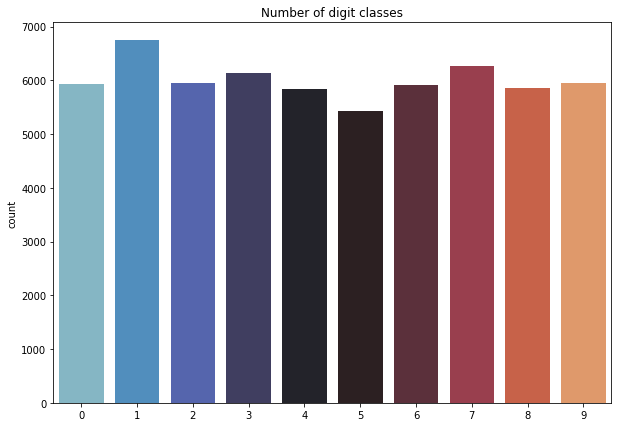

In [ ]:
plt.figure(figsize=(10,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(60000, 10)

In [ ]:
model = keras.Sequential (
    [
      keras.Input(shape =  input_shape),
    
      layers.Conv2D(8, kernel_size=(3,3), activation='relu'),
      layers.Conv2D(8, kernel_size=(3,3), activation='relu'),
      layers.MaxPool2D(pool_size=(2,2)),
     
      layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
      layers.Conv2D(16, kernel_size=(3,3), activation='relu'),
      layers.MaxPool2D(pool_size=(2,2)),
      
      layers.Flatten(),
      layers.Dropout(0.3),
      layers.Dense(num_classes, activation='softmax'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

Train the model

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

In [ ]:
batch_size = 128
epochs = 150  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

network_history = model.fit(x_train, y_train, batch_size=batch_size, callbacks=early_stopping,  epochs = epochs, validation_split=0.2)

Epoch 1/150
375/375 [==============================] - 31s 84ms/step - loss: 0.5853 - accuracy: 0.8109 - val_loss: 0.1491 - val_accuracy: 0.9570
Epoch 2/150
375/375 [==============================] - 31s 83ms/step - loss: 0.1627 - accuracy: 0.9506 - val_loss: 0.0833 - val_accuracy: 0.9760
Epoch 3/150
375/375 [==============================] - 31s 83ms/step - loss: 0.1180 - accuracy: 0.9627 - val_loss: 0.0663 - val_accuracy: 0.9811
Epoch 4/150
375/375 [==============================] - 31s 84ms/step - loss: 0.0944 - accuracy: 0.9711 - val_loss: 0.0585 - val_accuracy: 0.9822
Epoch 5/150
375/375 [==============================] - 31s 84ms/step - loss: 0.0844 - accuracy: 0.9740 - val_loss: 0.0504 - val_accuracy: 0.9855
Epoch 6/150
375/375 [==============================] - 31s 84ms/step - loss: 0.0723 - accuracy: 0.9771 - val_loss: 0.0469 - val_accuracy: 0.9862
Epoch 7/150
375/375 [==============================] - 31s 83ms/step - loss: 0.0659 - accuracy: 0.9792 - val_loss: 0.0507 - val_ac

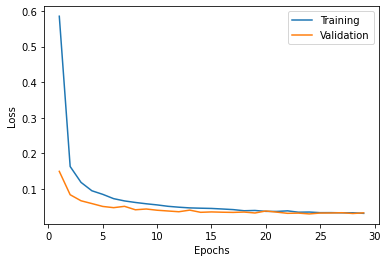

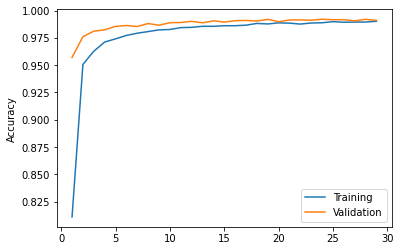

In [ ]:
x_plot = list(range(1,len(network_history.history['val_accuracy']) + 1))


def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    # plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

In [ ]:
score = model.evaluate(x_train, y_train, verbose=0)
print ('Train loss', score[0])
print('Train accuracy', score[1])

Train loss 0.018193982541561127
Train accuracy 0.9947666525840759


In [ ]:
predicted = np.round(model.predict(x_train))
from sklearn.metrics import classification_report
targets = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_train,predicted,  target_names=targets))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      0.99      1.00      5958
           3       1.00      0.99      1.00      6131
           4       0.99      1.00      0.99      5842
           5       0.99      0.99      0.99      5421
           6       1.00      1.00      1.00      5918
           7       1.00      0.99      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.99      0.99      5949

   micro avg       1.00      0.99      0.99     60000
   macro avg       1.00      0.99      0.99     60000
weighted avg       1.00      0.99      0.99     60000
 samples avg       0.99      0.99      0.99     60000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation on testset

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print ('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 3.8522143363952637
Test accuracy 0.9911999702453613


In [ ]:
predicted = np.round(model.predict(x_test))
from sklearn.metrics import classification_report
targets = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test,predicted,  target_names=targets))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.98      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000
 samples avg       0.99      0.99      0.99     10000

